In [124]:
import pandas as pd
import statsmodels.api as sm
import pylab as pl

import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as spst

import seaborn as sns
# read the data in
df = pd.read_csv("data_train.csv")

df.head()

,Unnamed: 0,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,27239,34,Local-gov,144182,Preschool,1,Never-married,Adm-clerical,Own-child,Black,Female,0,0,25,United-States,<=50K
1,19102,20,Private,100605,HS-grad,9,Never-married,Sales,Own-child,Other,Male,0,0,40,Puerto-Rico,<=50K
2,16791,26,State-gov,152457,HS-grad,9,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,2832,57,Self-emp-not-inc,353808,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,>50K
4,8228,48,State-gov,122086,HS-grad,9,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,<=50K


##### Pasul 1: Curatam baza de date:

In [125]:
line_wrong=df.columns[df.eq(' ?').any()]
print(line_wrong)

Index(['workclass', 'occupation', 'native-country'], dtype='object')


In [126]:
for i in range(len(line_wrong)):
    df=df[df[line_wrong[i]] != ' ?']

In [127]:
data=df.drop('Unnamed: 0', axis=1)
len(data)

27146

In [64]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,34,Local-gov,144182,Preschool,1,Never-married,Adm-clerical,Own-child,Black,Female,0,0,25,United-States,<=50K
1,20,Private,100605,HS-grad,9,Never-married,Sales,Own-child,Other,Male,0,0,40,Puerto-Rico,<=50K
2,26,State-gov,152457,HS-grad,9,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,57,Self-emp-not-inc,353808,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,>50K
4,48,State-gov,122086,HS-grad,9,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,<=50K


##### Pasul 2: ne pregatim baza de date pentru modelul logistic

In [65]:
data.label.replace((' <=50K', ' >50K'), (0, 1), inplace=True)

In [66]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,34,Local-gov,144182,Preschool,1,Never-married,Adm-clerical,Own-child,Black,Female,0,0,25,United-States,0
1,20,Private,100605,HS-grad,9,Never-married,Sales,Own-child,Other,Male,0,0,40,Puerto-Rico,0
2,26,State-gov,152457,HS-grad,9,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,0
3,57,Self-emp-not-inc,353808,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,1
4,48,State-gov,122086,HS-grad,9,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,0


In [67]:
data['label'].value_counts()

0    20423
1     6723
Name: label, dtype: int64

In [68]:
count_less_50 = len(data[data['label']==0])
count_more_50 = len(data[data['label']==1])
pct_of_less_50 = count_less_50/(count_less_50+count_more_50)
print("percentage of less 50 is", pct_of_less_50*100)
pct_of_more_50 = count_sub/(count_less_50+count_more_50)
print("percentage of more 50", pct_of_more_50*100)

percentage of less 50 is 75.23392028291461
percentage of more 50 24.76607971708539


#### Clasele noastre nu sunt echilibrate, raportul de venituri rezultate mai mici sau egale cu 50 la veniturile mai mari ca 50 este 75/25. Inainte de a echilibra clasele, putem sa mai exploram baza de date:

In [69]:
data.groupby('label').mean()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
label,,,,,,
0,36.590951,190032.669196,9.631200,148.193409,53.021544,39.338148
1,43.945411,188818.473449,11.608359,3947.726313,195.287520,45.753235


#### Observaţii:
Vârsta medie a persoanelor care au salarii mai mari de 50K este mai mare decat a persoanelor care au salariile <=50k.
Media orele lucrate pe saptamana este mai mare pentu cei cu salarii > 50K.
Media numarului de ani in sistemul educationl este mai mare pentru cei cu salarii > 50K.

Putem calcula mijloace categorice pentru alte variabile categorice, pentru a obține un sens mai detaliat al datelor noastre.

In [70]:
data.groupby('workclass').mean()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,label
workclass,,,,,,,
Federal-gov,42.648936,181554.968085,10.921986,767.268322,107.410165,41.128842,0.385343
Local-gov,41.672892,187784.848453,11.050160,849.869264,113.232124,41.027215,0.294023
Private,36.774293,192856.774443,9.871317,876.995762,79.404697,40.228648,0.217729
Self-emp-inc,46.070010,175054.122257,11.170324,4577.410658,160.079415,48.687565,0.554859
Self-emp-not-inc,45.035477,175167.049224,10.213304,2001.690909,115.274945,44.665188,0.287805
State-gov,39.093531,185368.174825,11.333042,729.217657,76.005245,39.085664,0.261364
Without-pay,47.461538,172421.769231,9.076923,525.384615,0.000000,32.923077,0.000000


#### Vizulaizarea datelor:

Text(0, 0.5, 'Venitul')

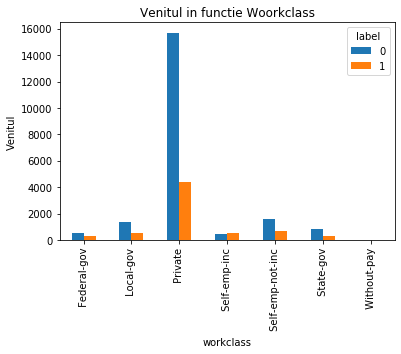

In [71]:
%matplotlib inline
pd.crosstab(data.workclass,data.label).plot(kind='bar')
plt.title('Venitul in functie Woorkclass')
plt.xlabel('workclass')
plt.ylabel('Venitul')

Text(0, 0.5, 'Label')

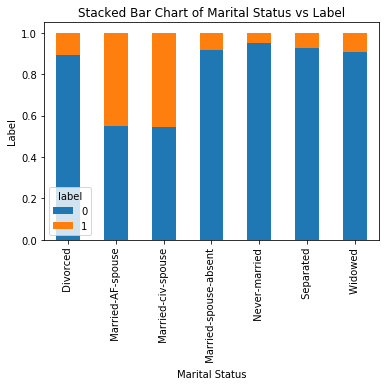

In [72]:
table=pd.crosstab(data['marital-status'],data.label)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Label')
plt.xlabel('Marital Status')
plt.ylabel('Label')

Text(0, 0.5, 'Label')

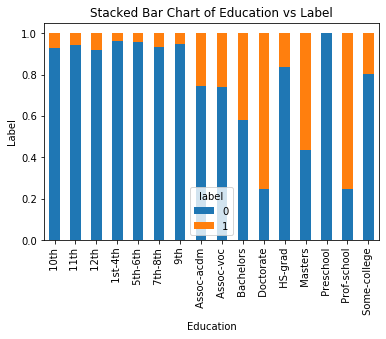

In [73]:
table=pd.crosstab(data.education,data.label)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Label')
plt.xlabel('Education')#### Education seems a good predictor of the outcome variable.
plt.ylabel('Label')

#### Education seems a good predictor of the outcome variable.
Pentru un model mai corect am putea grupa primele 7 coloane, deoarece intre ele nu exista o diferenta vizibila, insa vom continua asa

Text(0, 0.5, 'Label')

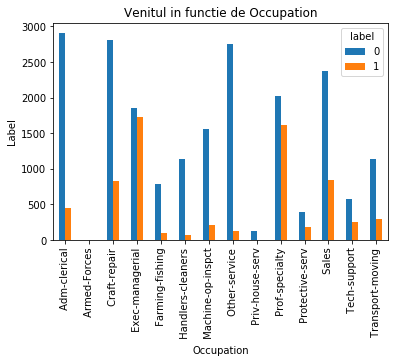

In [74]:
pd.crosstab(data.occupation,data.label).plot(kind='bar')
plt.title('Venitul in functie de Occupation')
plt.xlabel('Occupation')
plt.ylabel('Label')

Text(0, 0.5, 'Label')

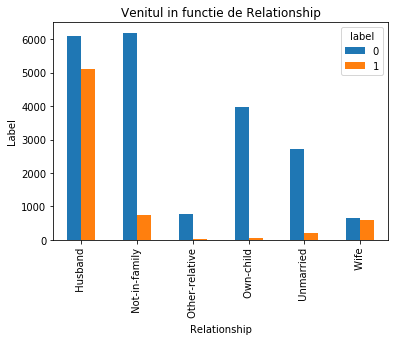

In [75]:
pd.crosstab(data.relationship,data.label).plot(kind='bar')
plt.title('Venitul in functie de Relationship')
plt.xlabel('Relationship')
plt.ylabel('Label')

Text(0, 0.5, 'Label')

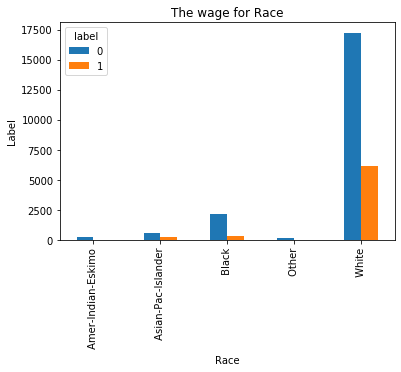

In [76]:
pd.crosstab(data.race,data.label).plot(kind='bar')
plt.title('The wage for Race')
plt.xlabel('Race')
plt.ylabel('Label')

Text(0, 0.5, 'The wage')

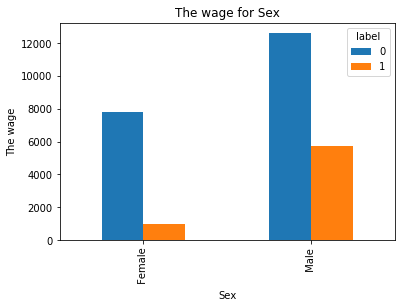

In [77]:
pd.crosstab(data.sex,data.label).plot(kind='bar')
plt.title('The wage for Sex')
plt.xlabel('Sex')
plt.ylabel('The wage')

Text(0, 0.5, 'Wage')

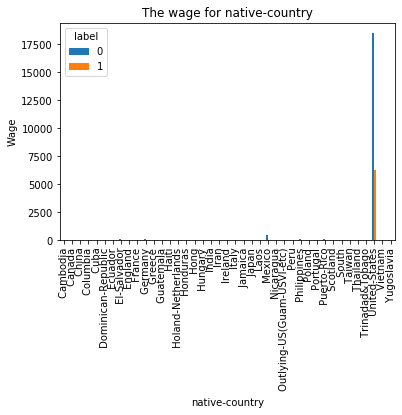

In [78]:
pd.crosstab(data['native-country'],data.label).plot(kind='bar')
plt.title('The wage for native-country')
plt.xlabel('native-country')
plt.ylabel('Wage')

##### Observam ca datele din coloana 'native-country' a setului de date are multe categorii și trebuie să reducem categoriile pentru o modelare mai bună; observam si din grafic ca datele ar putea fi grupare in nativi din Statele-Unite, nativi din afara Statelor Unite: Out_of_US

In [79]:
data['native-country']=np.where(data['native-country'] !=' United-States', 'Out_of_US', data['native-country'])

In [80]:
data['native-country']

0         United-States
1             Out_of_US
2         United-States
3         United-States
4         United-States
              ...      
29298         Out_of_US
29299     United-States
29300     United-States
29301     United-States
29303     United-States
Name: native-country, Length: 27146, dtype: object

Text(0, 0.5, 'Wage')

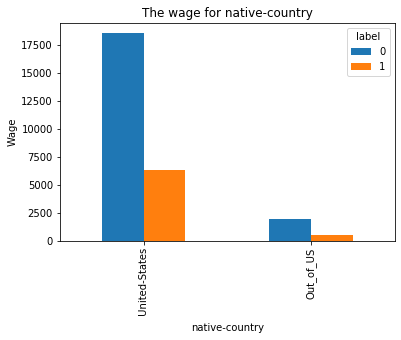

In [81]:
pd.crosstab(data['native-country'],data.label).plot(kind='bar')
plt.title('The wage for native-country')
plt.xlabel('native-country')
plt.ylabel('Wage')

#### Create dummy variables

In [82]:

#That is variables with only two values, zero and one.

cat_vars=['workclass','education','marital-status','occupation','relationship','race','sex','native-country']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1
cat_vars=['workclass','education','marital-status','occupation','relationship','race','sex','native-country']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

data_final=data[to_keep]
data_final.columns.values

array(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'label', 'workclass_ Federal-gov',
       'workclass_ Local-gov', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay',
       'education_ 10th', 'education_ 11th', 'education_ 12th',
       'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th',
       'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc',
       'education_ Bachelors', 'education_ Doctorate',
       'education_ HS-grad', 'education_ Masters', 'education_ Preschool',
       'education_ Prof-school', 'education_ Some-college',
       'marital-status_ Divorced', 'marital-status_ Married-AF-spouse',
       'marital-status_ Married-civ-spouse',
       'marital-status_ Married-spouse-absent',
       'marital-status_ Never-married', 'marital-status_ Separated',
       'marital-status_ Widowed', 'occupation_ Adm-cleric

In [83]:
data_final.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,label,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,...,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,native-country_ United-States,native-country_Out_of_US
0,34,144182,1,0,0,25,0,0,1,0,...,0,0,0,1,0,0,1,0,1,0
1,20,100605,9,0,0,40,0,0,0,1,...,0,0,0,0,1,0,0,1,0,1
2,26,152457,9,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
3,57,353808,10,0,0,60,1,0,0,0,...,0,0,0,0,0,1,0,1,1,0
4,48,122086,9,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0


#### Pasul 3: Construim modelul

In [84]:
#Over-sampling using SMOTE

In [97]:
X = data_final.loc[:, data_final.columns != 'label']
y = data_final.loc[:, data_final.columns == 'label']

from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
columns = X_train.columns

os_data_X,os_data_y=os.fit_sample(X_train, y_train)

os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['label'])

# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of the wage<=50K in oversampled data",len(os_data_y[os_data_y['label']==0]))
print("Number of the wage>50K",len(os_data_y[os_data_y['label']==1]))
print("Proportion of the wage<=50K in oversampled data is ",len(os_data_y[os_data_y['label']==0])/len(os_data_X))
print("Proportion of the wage>50K  in oversampled data is ",len(os_data_y[os_data_y['label']==1])/len(os_data_X))

length of oversampled data is  32626
Number of the wage<=50K in oversampled data 16313
Number of the wage>50K 16313
Proportion of the wage<=50K in oversampled data is  0.5
Proportion of the wage>50K  in oversampled data is  0.5


##### Pasul 4: Folosim Recursive Feature Elimination

In [98]:
data_final_vars=data_final.columns.values.tolist()
y=['label']
X=[i for i in data_final_vars if i not in y]

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=1e40,solver = 'lbfgs')
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True False False  True False False False
 False False False False False False False False False False False False
  True False False False  True  True False  True False  True False False
  True False False False False False False  True False False False False
 False False  True  True False  True  True False False False False False
 False  True  True False False]
[ 1  1  1  1  1  1 34 15  1 41  9 21 44 16 11 27 40 31 23 24 22 19 30 38
  1 28 42 33  1  1 46  1 29  1 13 18  1 45  3 17 14  8  6  1 39 37 35  4
 26 10  1  1 12  1  1 43 32 25  2 36 20  1  1  7  5]


In [99]:
a=rfe.ranking_
col=[]
for i in range(len(a)):
    if a[i]==1:
        col.append(i)

In [100]:
col

[0, 1, 2, 3, 4, 5, 8, 24, 28, 29, 31, 33, 36, 43, 50, 51, 53, 54, 61, 62]

#### The RFE has helped us select the following features: [0,1,2,3,4,5,8,24,28,29,31,33,36,43,50,51,53,54,61,62]

In [101]:
cols=os_data_X.columns[col]

X=os_data_X[cols]
y=os_data_y['label']

import statsmodels.api as sm

logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.313843
         Iterations 9
                                  Results: Logit
Model:                    Logit                  Pseudo R-squared:       0.547     
Dependent Variable:       label                  AIC:                    20518.8631
Date:                     2019-11-30 23:25       BIC:                    20686.7204
No. Observations:         32626                  Log-Likelihood:         -10239.   
Df Model:                 19                     LL-Null:                -22615.   
Df Residuals:             32606                  LLR p-value:            0.0000    
Converged:                1.0000                 Scale:                  1.0000    
No. Iterations:           9.0000                                                   
-----------------------------------------------------------------------------------
                                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------

In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
logreg = LogisticRegression(C=1e40,solver = 'lbfgs')
logreg.fit(X_train, y_train)

LogisticRegression(C=1e+40, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [109]:
print(len(X_train),len(X_test),len(y_train),len(y_test))

26100 6526 26100 6526


In [110]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.79


In [57]:
cols=[x for x in cols if x != 'fnlwgt']
cols

['age',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'workclass_ Private',
 'education_ HS-grad',
 'education_ Some-college',
 'marital-status_ Divorced',
 'marital-status_ Married-civ-spouse',
 'marital-status_ Never-married',
 'occupation_ Adm-clerical',
 'occupation_ Other-service',
 'relationship_ Husband',
 'relationship_ Not-in-family',
 'relationship_ Own-child',
 'relationship_ Unmarried',
 'sex_ Female',
 'sex_ Male']

In [111]:
dataset_pred = pd.DataFrame({'Y_pred': y_pred})

In [112]:
dataset_pred

,Y_pred
0,0
1,0
2,0
3,0
4,0
...,...
6521,1
6522,0
6523,0
6524,0


## Functia de testare finala:

In [122]:
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.model_selection import train_test_split
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

def testare(dataF):
    line_wrong=dataF.columns[dataF.eq(' ?').any()]
    for i in range(len(line_wrong)):
        dataF=dataF[dataF[line_wrong[i]] != ' ?']
    data=dataF.drop('Unnamed: 0', axis=1)
    data.label.replace((' <=50K', ' >50K'), (0, 1), inplace=True)
    data['native-country']=np.where(data['native-country'] !=' United-States', 'Out_of_US', data['native-country'])
    cat_vars=['workclass','education','marital-status','occupation','relationship','race','sex','native-country']
    for var in cat_vars:
        cat_list='var'+'_'+var
        cat_list = pd.get_dummies(data[var], prefix=var)
        data1=data.join(cat_list)
        data=data1
    cat_vars=['workclass','education','marital-status','occupation','relationship','race','sex','native-country']
    data_vars=data.columns.values.tolist()
    to_keep=[i for i in data_vars if i not in cat_vars]
    data_final=data[to_keep]
    X = data_final.loc[:, data_final.columns != 'label']
    y = data_final.loc[:, data_final.columns == 'label']
    os = SMOTE(random_state=0)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    columns = X_train.columns
    os_data_X,os_data_y=os.fit_sample(X_train, y_train)
    os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
    os_data_y= pd.DataFrame(data=os_data_y,columns=['label'])
    
    data_final_vars=data_final.columns.values.tolist()
    y=['label']
    X=[i for i in data_final_vars if i not in y]
    logreg = LogisticRegression(C=1e40,solver = 'lbfgs')
    rfe = RFE(logreg, 20)
    rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
    a=rfe.ranking_
    col=[]
    for i in range(len(a)):
        if a[i]==1:
            col.append(i)
    cols=os_data_X.columns[col]
    cols=[x for x in cols if x != 'fnlwgt']
    X=os_data_X[cols]
    y=os_data_y['label']
    logit_model=sm.Logit(y,X)
    result=logit_model.fit()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    dataset_pred = pd.DataFrame({'Y_pred': y_pred})
    return dataset_pred

    
    

In [123]:
testare(df)

Optimization terminated successfully.
         Current function value: 0.312989
         Iterations 9


,Y_pred
0,0
1,0
2,0
3,0
4,1
...,...
8559,0
8560,0
8561,0
8562,1
